In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [2]:
# reading the data
score = pd.read_csv("student_scores.csv")
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#shape of dataset 
score.shape

(25, 2)

In [4]:
# checking the info of dataset
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# checking duplicates 
score.duplicated().sum()

0

In [6]:
# checking describing of dataset
score.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


## Data Visualization

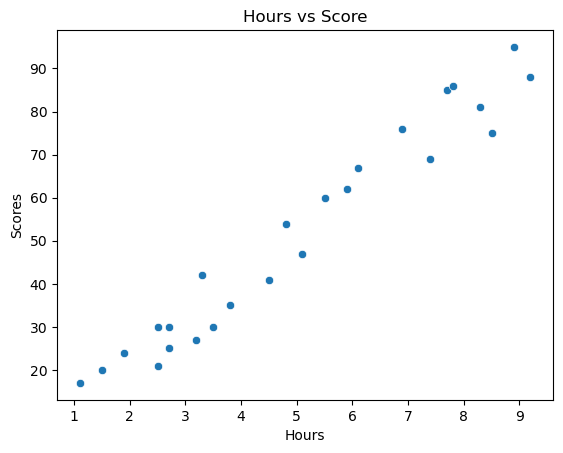

In [7]:
sns.scatterplot(data = score,x = "Hours",y="Scores")
plt.title('Hours vs Score') 
plt.show()

From above scatter plot observe that hours and score is positive relation between them.

## Data Preprocessing

In [8]:
x = score.iloc[:, :-1] 
y = score.iloc[:, 1]

In [9]:
# spliting data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0) 

In [10]:
# training model
from sklearn.linear_model import LinearRegression
linear= LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

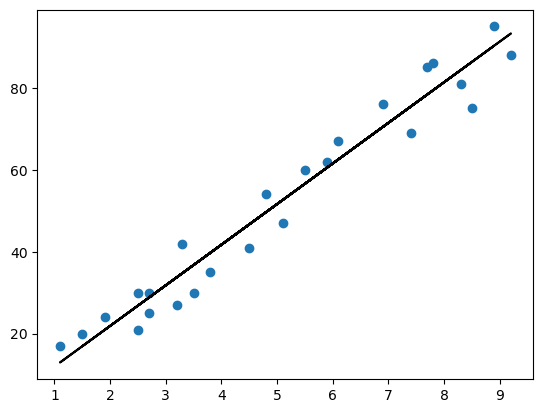

In [11]:
# Plotting the regression line
line = linear.coef_*x+linear.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='k');
plt.show()

In [12]:
# prediction 
predict= linear.predict(x_test)

In [13]:
compare_data= pd.DataFrame({'Actual': y_test, 'Predicted': predict}) 
compare_data

,Actual,Predicted
5,20,16.927148
2,27,33.788269
19,69,75.445158
16,30,26.845455


In [14]:
#Estimating training and test score
print("Training Score:",linear.score(x_train,y_train))
print("Test Score:",linear.score(x_test,y_test))

Training Score: 0.9516157390656382
Test Score: 0.9267527498952749


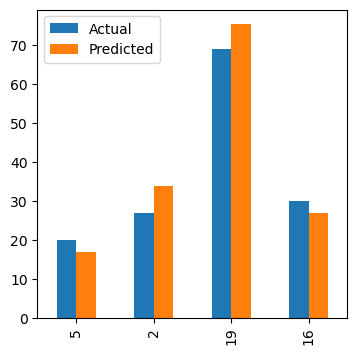

In [15]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
compare_data.plot(kind='bar',figsize=(4,4))
plt.show()

In [16]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predict)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('R-2:', metrics.r2_score(y_test, predict))

Mean Absolute Error: 4.865206019265337
Mean Squared Error: 26.753558100750855
Root Mean Squared Error: 5.1723841795395336
R-2: 0.9267527498952749


In [17]:
# prediction the score for 9.25 hours
print(f'Score of student who studied for 9.25 hours = {linear.predict([[9.25]])}')

Score of student who studied for 9.25 hours = [93.7940249]


## Conclusion 
To predict unseen data `R-square` is good which is gives good performance 

